In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import os
import json
import math

from flatten_json import flatten

In [28]:
fp = 'tests/test.json'
with open(fp) as f:
    data = json.load(f)


testWalk = data['testWalk']
testWalk = [flatten(d, separator='.') for d in testWalk]
df = pd.DataFrame(testWalk)

In [29]:
df.head()

,args,kwargs,startTimestamp,startEnvironment.player.name,startEnvironment.player.pos.0,startEnvironment.player.pos.1,startEnvironment.player.pos.2,startEnvironment.player.gamemode,startEnvironment.player.inventory,startEnvironment.world.identifier,...,result.start.1,result.start.2,result.end.0.0,result.end.0.1,result.end.0.2,result.end.1.0,result.end.1.1,result.end.1.2,endEnvironment.player.inventory.minecraft:wheat_seeds,endEnvironment.player.inventory.minecraft:clay_ball
0,[],{},1.700259e+09,Ailicia,3202.5,61.336871,1954.5,creative,{},LOCAL_New World (1),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],{},1.700259e+09,Ailicia,5659.5,61.336871,6397.5,survival,{},LOCAL_New World (1),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],{},1.700259e+09,Ailicia,8370.5,68.000000,12001.5,survival,{},LOCAL_New World (1),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],{},1.700259e+09,Ailicia,10094.5,62.347576,21093.5,survival,{},LOCAL_New World (1),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],{},1.700260e+09,Ailicia,19430.5,80.000000,26302.5,survival,{},LOCAL_New World (1),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.shape

(61, 64)

In [31]:
df.columns

Index(['args', 'kwargs', 'startTimestamp', 'startEnvironment.player.name',
       'startEnvironment.player.pos.0', 'startEnvironment.player.pos.1',
       'startEnvironment.player.pos.2', 'startEnvironment.player.gamemode',
       'startEnvironment.player.inventory',
       'startEnvironment.world.identifier', 'startEnvironment.world.time',
       'startEnvironment.world.timeOfDay', 'startEnvironment.world.dimension',
       'startEnvironment.world.biome', 'startEnvironment.world.difficulty',
       'startEnvironment.world.weather.raining',
       'startEnvironment.world.weather.thundering',
       'startEnvironment.world.weather.isDay',
       'startEnvironment.world.weather.isNight',
       'startEnvironment.world.weather.moonPhase',
       'startEnvironment.client.version', 'startEnvironment.client.modLoader',
       'startEnvironment.client.fps', 'result', 'error', 'traceback',
       'endTimestamp', 'duration', 'endEnvironment.player.name',
       'endEnvironment.player.pos.0', 'e

In [32]:
df['error'].value_counts()

Script not registered or removed.    31
Path not found                       23
Name: error, dtype: int64

In [33]:
x = df['startEnvironment.player.pos.0']
y = df['startEnvironment.player.pos.1']
z = df['startEnvironment.player.pos.2']

x1 = df['endEnvironment.player.pos.0']
y1 = df['endEnvironment.player.pos.1']
z1 = df['endEnvironment.player.pos.2']

df['distance'] = np.sqrt((x1-x)**2 + (y1-y)**2 + (z1-z)**2)

In [34]:
df = df[df['distance'] >= 10]

In [35]:
df.shape

(56, 65)

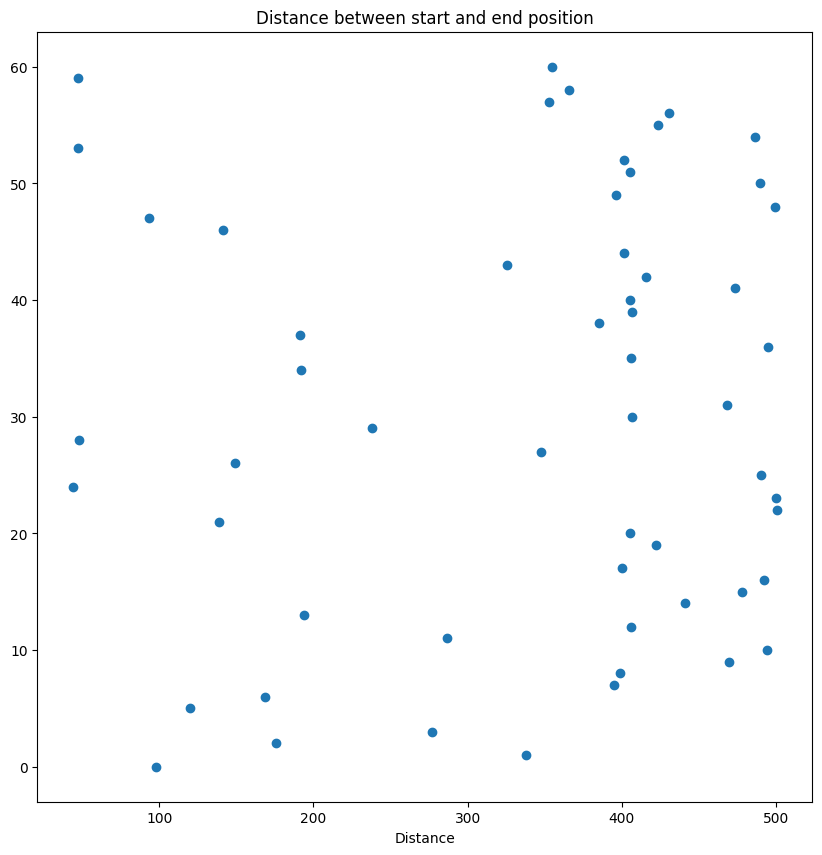

In [36]:
# scatter distance

fig = plt.figure(figsize=(10,10))
plt.scatter(df['distance'], df.index)
plt.xlabel('Distance')
plt.title('Distance between start and end position')
plt.show()

In [40]:
df['biomeName'] = df['startEnvironment.world.biome'].apply(
    lambda x: x.replace('minecraft:', '').title())

<AxesSubplot: >

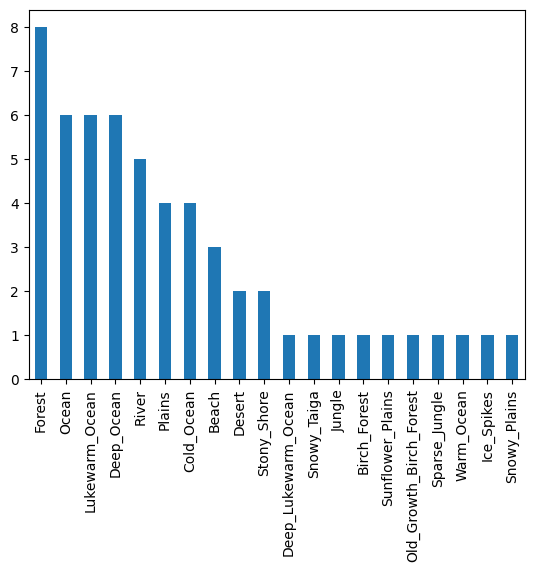

In [41]:
df['biomeName'].value_counts().plot(kind='bar')


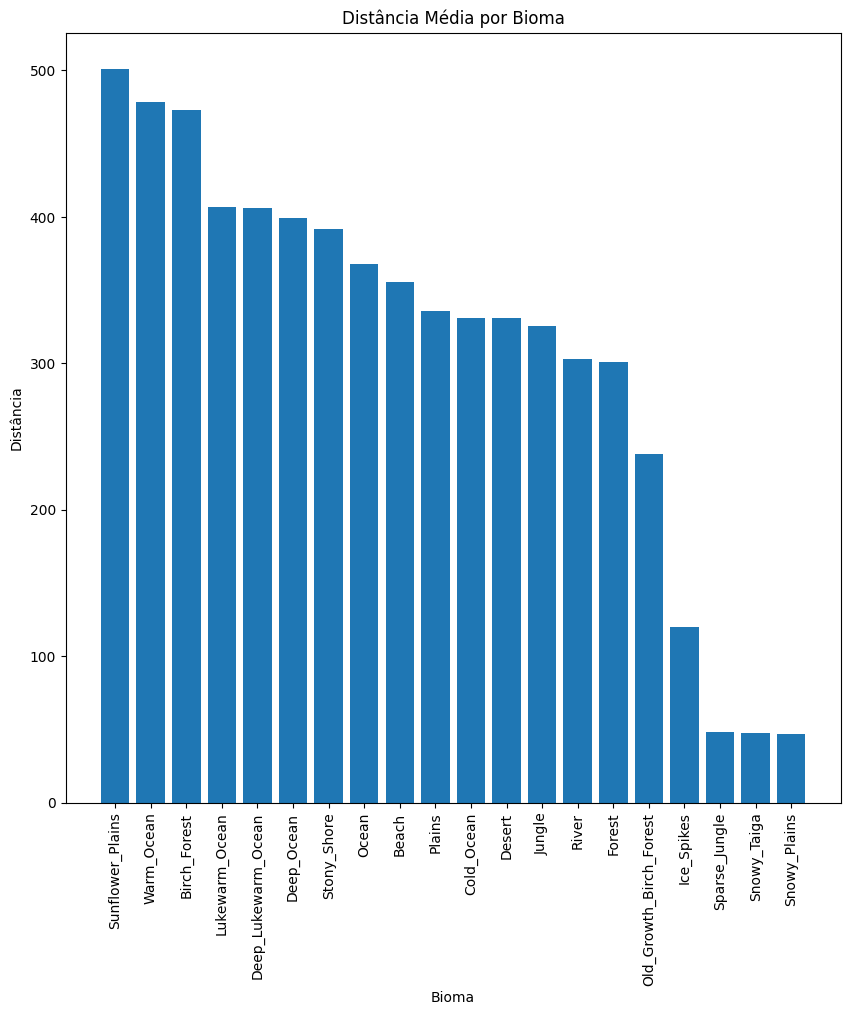

In [48]:
# distance by biome
mean = df.groupby('biomeName')['distance'].mean()
mean = mean.sort_values(ascending=False)
fig = plt.figure(figsize=(10,10))
plt.bar(mean.index, mean)
plt.xlabel('Bioma')
plt.ylabel('Distância')
plt.title('Distância Média por Bioma')
plt.xticks(rotation=90)
plt.show()

In [46]:
# mean distance
print(df['distance'].mean())
df['distance'].mean()/240

336.14833191204156


1.4006180496335066